In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
warnings.filterwarnings(action = 'ignore')

In [3]:
rc = {
    "axes.facecolor": "#FFFFFF",       # Pale blue color
    "figure.facecolor": "#FFFFFF",
    "axes.edgecolor": "#000000",
    "grid.color": "#CCCCCC",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
sns.set_palette(palette = 'Blues_r')
# Your plotting code here


In [4]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [5]:
obj_cols = df.describe(include = 'O').columns

for col in obj_cols:
    
    print('--' * 20)
    display(df[col].value_counts())

----------------------------------------


Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

----------------------------------------


Yes    175
No     174
Name: Fever, dtype: int64

----------------------------------------


No     182
Yes    167
Name: Cough, dtype: int64

----------------------------------------


Yes    242
No     107
Name: Fatigue, dtype: int64

----------------------------------------


No     261
Yes     88
Name: Difficulty Breathing, dtype: int64

----------------------------------------


Female    176
Male      173
Name: Gender, dtype: int64

----------------------------------------


High      167
Normal    164
Low        18
Name: Blood Pressure, dtype: int64

----------------------------------------


High      166
Normal    149
Low        34
Name: Cholesterol Level, dtype: int64

----------------------------------------


Positive    186
Negative    163
Name: Outcome Variable, dtype: int64

# EDA 


Text(0.5, 1.1, 'Disease Distribution')

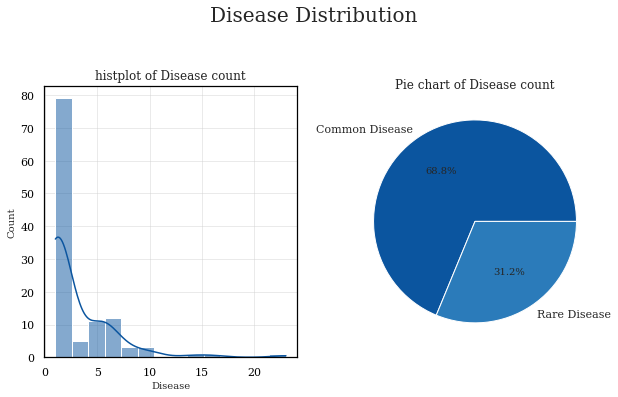

In [6]:
disease_count = pd.DataFrame(df['Disease'].value_counts()).reset_index()
num_disease = len(disease_count)

fig,ax = plt.subplots(ncols = 2, figsize = (10,5))

common_disease = disease_count[disease_count['Disease'] > 3]
rare_disease = disease_count[disease_count['Disease'] <= 3]

sns.histplot(data = disease_count, x = 'Disease',kde = True,
            ax = ax[0])
ax[0].set_ylabel('Count')
ax[0].set_title('histplot of Disease count')


disease_pie = disease_count.copy()

disease_pie['index'] = disease_count['index'].map({com_dis : 'Common Disease' for com_dis in common_disease['index']})
disease_pie['index'] = disease_pie['index'].fillna('Rare Disease')

disease_percent = disease_pie.groupby('index').sum().reset_index()

ax[1].pie(disease_percent['Disease'], labels=disease_percent['index'], autopct='%1.1f%%')
ax[1].set_title('Pie chart of Disease count')

fig.suptitle('Disease Distribution', fontsize = 20, y = 1.1)

Text(0.5, 1.0, 'Countplot of Common disease')

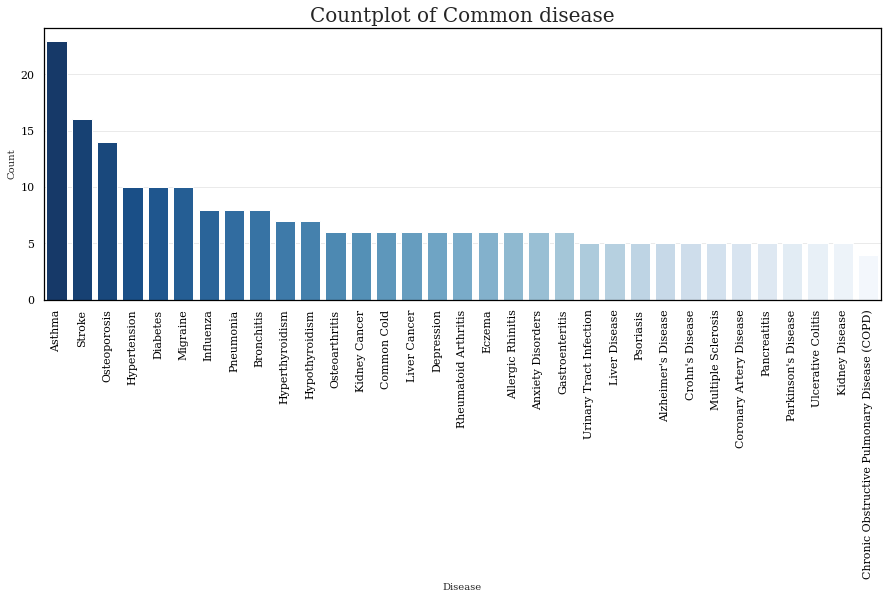

In [7]:
plt.figure(figsize = (15,5))

sns.barplot(data = common_disease,
           x = 'index',
           y = 'Disease',
           palette = 'Blues_r')
plt.xticks(rotation = 90)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Countplot of Common disease', fontsize = 20)

Text(0.5, 0.98, 'Histplot of Objective Value')

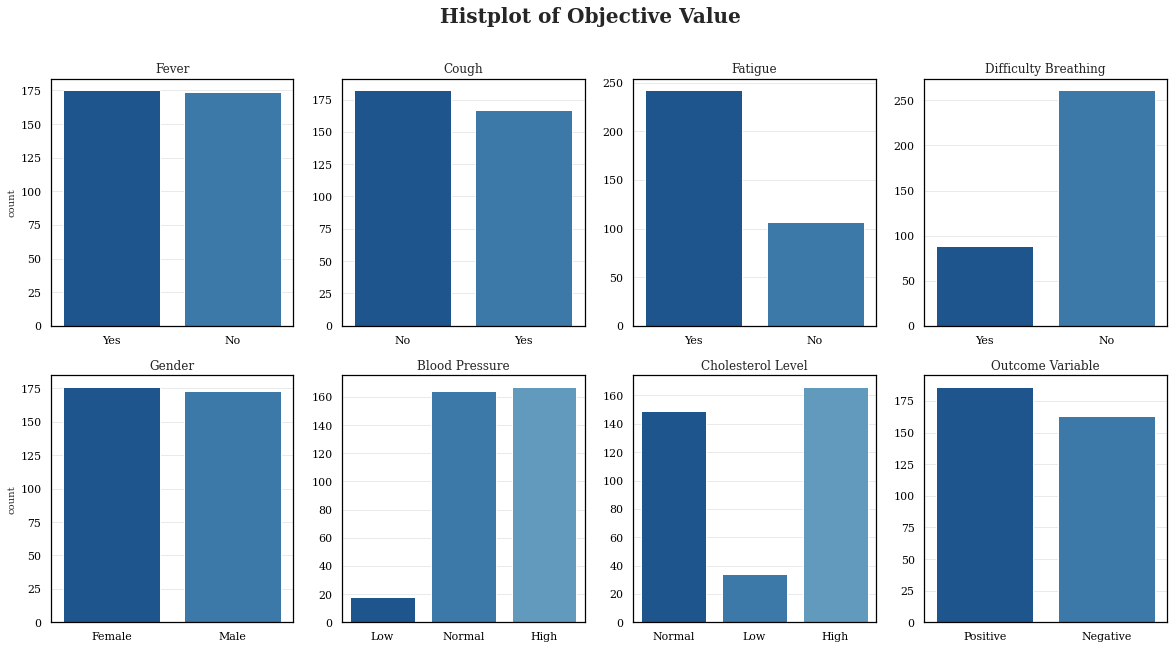

In [8]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level','Outcome Variable']

fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (20,10))
ax = ax.flatten()

for i,col in enumerate(cols):
    
    sns.countplot(data = df,
                x = col,
                ax = ax[i])
    
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 4 != 0:
        ax[i].set_ylabel('')
    
fig.suptitle('Histplot of Objective Value', weight = 'bold', fontsize = 20)

Text(0.5, 0.98, 'Boxplot of Age by Objective value')

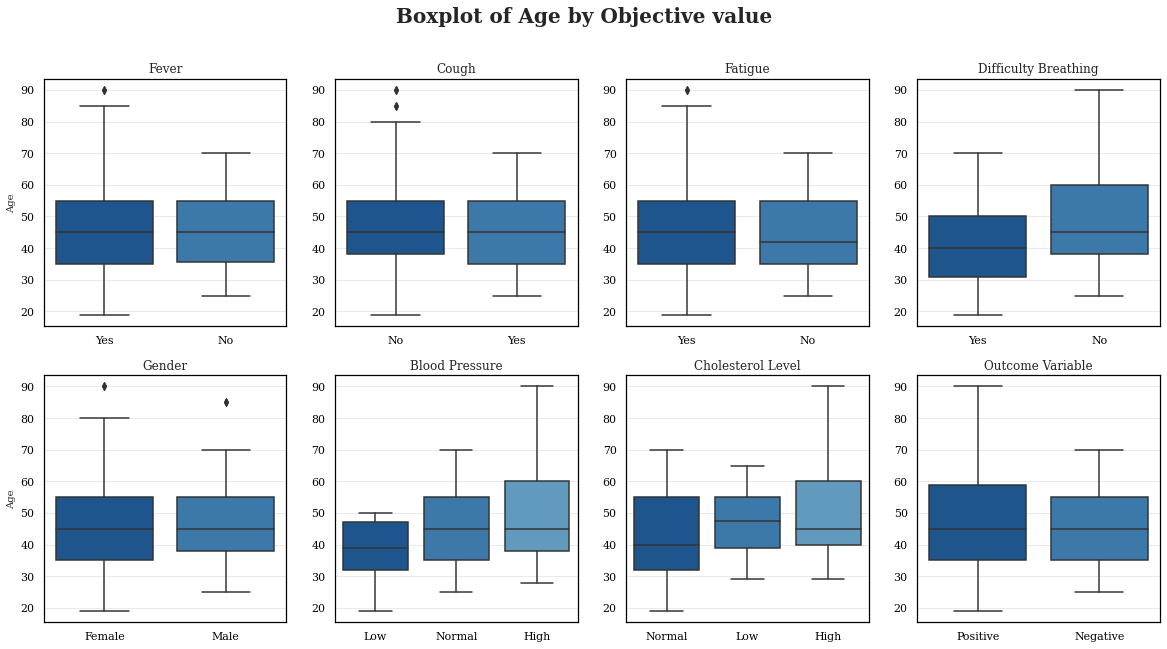

In [9]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level','Outcome Variable']

fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (20,10))
ax = ax.flatten()

for i,col in enumerate(cols):
    
    sns.boxplot(data = df,
                x = col,
                y = 'Age',
                ax = ax[i])
    
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 4 != 0:
        ax[i].set_ylabel('')
    
fig.suptitle('Boxplot of Age by Objective value', weight = 'bold', fontsize = 20)

## PCA

In [10]:
def preprocessing_for_pca(data):
    
    target = data['Outcome Variable']
    age = data['Age']
    
    data = data.drop(['Age','Outcome Variable'],axis = 1)
    
    data = pd.get_dummies(data)
    data['Age'] = age
    
    return data, target

In [11]:
pca = PCA(n_components = 2)

decomp_df,target = preprocessing_for_pca(df)


pca_df = pca.fit_transform(decomp_df) 

Text(0, 0.5, 'Comp 2')

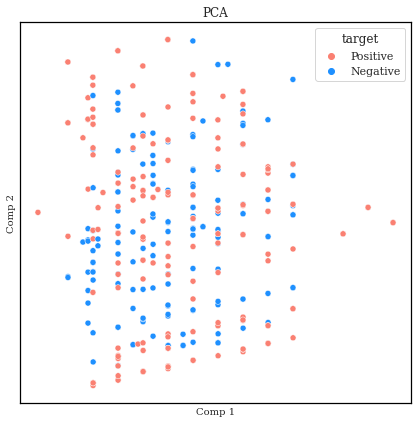

In [12]:
pca = PCA(n_components = 2)

decomp_df,target = preprocessing_for_pca(df)


pca_df = pd.DataFrame(pca.fit_transform(decomp_df)) 

pca_df['target'] = target

plt.figure(figsize = (7,7))

sns.scatterplot(data = pca_df,
               x = 0,
               y = 1,
               hue = 'target',
               palette = ['Salmon','dodgerblue'])
plt.title('PCA')
plt.xticks([])
plt.yticks([])
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

# Modeling 

The oof (out-of-fold) prediction method is a technique commonly used in machine learning, particularly when working with cross-validation. It allows us to make predictions on the training set's data points that were not used during the model training process.


1. Splitting the data: The dataset is divided into K folds (subsets) using a technique called K-fold cross-validation. Each fold represents a different partition of the data.

2. Training and validation: The model is trained K times, each time using K-1 folds for training and 1 fold for validation. This means that each fold serves as a validation set once, while the remaining folds are used for training the model.

3. Out-of-fold prediction: During each iteration, after training the model on K-1 folds, the model is used to make predictions on the held-out fold (the validation set) that was not seen during training. These predictions are called "out-of-fold" predictions.

4. Combining predictions: After all K iterations, we have obtained K sets of out-of-fold predictions, each corresponding to a different fold. These predictions can be combined to create a single prediction for each data point in the training set.

5. Evaluation and analysis: The combined out-of-fold predictions can be evaluated against the true labels of the training set. This evaluation provides insights into the model's performance, such as accuracy, error metrics, or any other relevant evaluation metric.

The oof prediction method is useful for assessing the model's performance on unseen data points within the training set itself. It helps in evaluating the model's generalization capabilities and can be used for tasks such as model selection, hyperparameter tuning, or identifying potential issues like overfitting.

By leveraging the oof prediction method with K-fold cross-validation, we can obtain a more reliable estimate of the model's performance and gain insights into its behavior on unseen data.

In [13]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
X = pd.get_dummies(df.iloc[:,:-1])
y = df.iloc[:,-1].map({'Positive':1,'Negative':0})

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

param_grid = {
    'n_estimators': 300,  
    'min_samples_split': 5   
}


model = RandomForestClassifier(**param_grid, random_state = 42)

In [15]:
splits = 20
cv = KFold(n_splits = splits, random_state = 42, shuffle = True)

oof = [np.zeros((len(y_test),1)) for _ in range(splits)]

for i,(train_idx,test_idx) in enumerate(cv.split(x_train,y_train)):
    
    train_x,train_y = x_train.iloc[train_idx],y_train.iloc[train_idx]
    valid_x,valid_y = x_train.iloc[test_idx],y_train.iloc[test_idx]
    
    model.fit(train_x,train_y)
    valid_pred = model.predict(valid_x)
    
    oof[i] = model.predict_proba(x_test)[:,1] / splits
    
    score = accuracy_score(valid_y, valid_pred)
    print(f'{i + 1} Fold Set Accuracy : {score}')

1 Fold Set Accuracy : 0.7857142857142857
2 Fold Set Accuracy : 0.8571428571428571
3 Fold Set Accuracy : 0.6428571428571429
4 Fold Set Accuracy : 0.7142857142857143
5 Fold Set Accuracy : 0.7857142857142857
6 Fold Set Accuracy : 0.7857142857142857
7 Fold Set Accuracy : 0.7142857142857143
8 Fold Set Accuracy : 0.7142857142857143
9 Fold Set Accuracy : 0.7857142857142857
10 Fold Set Accuracy : 0.7857142857142857
11 Fold Set Accuracy : 0.9285714285714286
12 Fold Set Accuracy : 1.0
13 Fold Set Accuracy : 0.8571428571428571
14 Fold Set Accuracy : 0.5714285714285714
15 Fold Set Accuracy : 0.7142857142857143
16 Fold Set Accuracy : 0.8571428571428571
17 Fold Set Accuracy : 0.7857142857142857
18 Fold Set Accuracy : 0.7857142857142857
19 Fold Set Accuracy : 0.5714285714285714
20 Fold Set Accuracy : 0.5384615384615384


In [16]:
test_pred = (np.sum(oof,axis = 0) > 0.5).astype(int)

test_score = round(accuracy_score(y_test,test_pred),3)

print(f'Test Set Accuracy : {test_score}')

Test Set Accuracy : 0.814


Text(0.5, 1.0, 'Confusion Matrix')

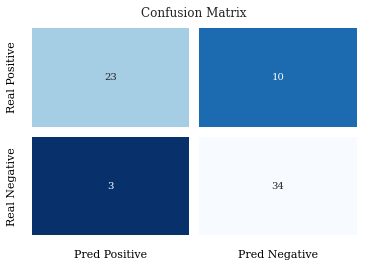

In [17]:
cf_matrix = pd.DataFrame(confusion_matrix(y_test,test_pred),
            index = ['Real Positive', 'Real Negative'],
            columns = ['Pred Positive', 'Pred Negative'])

sns.heatmap(cf_matrix, annot = True, cmap = 'Blues_r', cbar = False,
           linewidth = 10)
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Feature Importance')

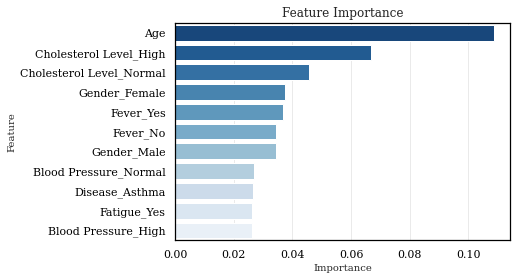

In [18]:
importance = pd.DataFrame({'Feature':x_train.columns,
             'Importance':model.feature_importances_}).sort_values(by = 'Importance',ascending = False)

sns.barplot(data = importance[:11],
           x = 'Importance',
           y = 'Feature',
           palette = 'Blues_r')
plt.title('Feature Importance')

# Thx :) 